# Support Vector Machine

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load train and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
# Sample 10% of your training data for testing code functionality
sample_train_df = train_df.sample(frac=0.01, random_state=42)
sample_train_df.shape

# Separate features and labels in the training data
X = sample_train_df.drop('label', axis=1)
y = sample_train_df['label']


In [2]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:

# Define SVM model
svm_model = SVC()

# Define parameters for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Perform grid search
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [4]:
# Use best model from grid search
best_model_SVM = grid_search.best_estimator_
# Make predictions on the test set from the training data
y_pred_SVM = best_model_SVM.predict(X_test)

In [5]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_SVM)
print("Accuracy:", accuracy * 100)


Accuracy: 80.95238095238095


# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

# Define parameters for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(tree_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [32]:

# Use best model from grid search
best_model_dt = grid_search.best_estimator_
y_pred_dt = best_model_dt.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy * 100)


Accuracy: 53.17460317460318


# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()

# Define parameters for grid search
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform grid search
grid_search = GridSearchCV(forest_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [34]:

# Use best model from grid search
best_model_rt = grid_search.best_estimator_


y_pred_rt = best_model_rt.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rt)
print("Accuracy:", accuracy * 100)


Accuracy: 80.15873015873017


# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)  # You can adjust the max_iter parameter as needed


In [36]:

# Define parameters for grid search
logreg_param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'penalty': ['l1', 'l2']
}

# Perform grid search for Logistic Regression
logreg_grid_search = GridSearchCV(logreg_model, logreg_param_grid, cv=5)
logreg_grid_search.fit(X_train, y_train)

# Get best parameters for Logistic Regression
best_logreg_params = logreg_grid_search.best_params_
print("Best Parameters for Logistic Regression:", best_logreg_params)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [37]:

# Use best Logistic Regression model from grid search
best_logreg_model = logreg_grid_search.best_estimator_

# Make predictions on the test set from the training data using Logistic Regression
y_logreg_pred = best_logreg_model.predict(X_test)


In [38]:

# Calculate accuracy for Logistic Regression
logreg_accuracy = accuracy_score(y_test, y_logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy * 100)


Logistic Regression Accuracy: 83.33333333333334


# K-Nearest Neighbor

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Define KNN model
knn_model = KNeighborsClassifier()

# Define parameters for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Test different values for K
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']  # Different distance metrics
}

# Perform grid search
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [40]:

# Use best model from grid search
best_model_knn = grid_search.best_estimator_

y_pred_knn = best_model_knn.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy * 100)


Accuracy: 67.46031746031747


# Neural Network

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [42]:

# Separate features and labels in the training data
X_train = sample_train_df.drop('label', axis=1).values.astype('float32')
y_train = sample_train_df['label'].values

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Convert labels to categorical (one-hot encoded)
y_train = to_categorical(y_train)

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [43]:

# Build a simple neural network model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1)


Epoch 1/10
6/6 [==============================] - 1s 59ms/step - loss: 1.9843 - accuracy: 0.4048 - val_loss: 0.9214 - val_accuracy: 0.7381
Epoch 2/10
6/6 [==============================] - 0s 19ms/step - loss: 0.6865 - accuracy: 0.7884 - val_loss: 0.5839 - val_accuracy: 0.8095
Epoch 3/10
6/6 [==============================] - 0s 19ms/step - loss: 0.3915 - accuracy: 0.8995 - val_loss: 0.4619 - val_accuracy: 0.8571
Epoch 4/10
6/6 [==============================] - 0s 19ms/step - loss: 0.2282 - accuracy: 0.9524 - val_loss: 0.4659 - val_accuracy: 0.8810
Epoch 5/10
6/6 [==============================] - 0s 21ms/step - loss: 0.1489 - accuracy: 0.9788 - val_loss: 0.4871 - val_accuracy: 0.8810
Epoch 6/10
6/6 [==============================] - 0s 18ms/step - loss: 0.1067 - accuracy: 0.9841 - val_loss: 0.5209 - val_accuracy: 0.8810
Epoch 7/10
6/6 [==============================] - 0s 19ms/step - loss: 0.0819 - accuracy: 0.9921 - val_loss: 0.5451 - val_accuracy: 0.8810
Epoch 8/10
6/6 [===========

In [45]:

# Predict on a subset of training data (for demonstration)
y_pred = np.argmax(model.predict(X_val), axis=-1)

# Calculate accuracy on the validation subset
accuracy = accuracy_score(np.argmax(y_val, axis=1), y_pred)
print("Accuracy:", accuracy * 100)


2/2 [==============================] - 0s 6ms/step
Accuracy: 85.71428571428571


# CNN

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Load the training and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Sample 10% of your training data for testing code functionality
sample_train_df = train_df.sample(frac=0.01, random_state=42)

# Separate features and labels in the training data
X = sample_train_df.drop('label', axis=1)
y = sample_train_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Preprocess the data
X_train_processed = X_train.values.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test_processed = X_test.values.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train_processed = to_categorical(y_train)
y_test_processed = to_categorical(y_test)

# Define a function to create the CNN model
def create_model(learning_rate=0.001):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model with the given learning rate
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
model = KerasClassifier(build_fn=create_model, learning_rate=0.001, epochs=10, batch_size=64, verbose=0)

param_grid = {'learning_rate': [0.001, 0.01, 0.1],
              'batch_size': [32, 64, 128]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_processed, y_train_processed)

print("Best Parameters: ", grid_result.best_params_)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a 

Best Parameters:  {'batch_size': 32, 'learning_rate': 0.1}


In [47]:
best_model = grid_result.best_estimator_


y_pred_train = best_model.predict(X_train_processed)

# Convert one-hot encoded y_pred_train to categorical labels
y_pred_categorical = np.argmax(y_pred_train, axis=1)

# Convert y_train_processed back to categorical labels
y_train_categorical = np.argmax(y_train_processed, axis=1)

# Calculate accuracy manually
train_accuracy = np.mean(y_pred_categorical == y_train_categorical)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

# Use the best model to make predictions on test data
y_pred_test = best_model.predict(X_test_processed)

# Convert one-hot encoded labels to categorical labels
y_test_categorical = np.argmax(y_test_processed, axis=1)

# Calculate accuracy manually
test_accuracy = np.mean(np.argmax(y_pred_test, axis=1) == y_test_categorical)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Train Accuracy: 99.32%
Test Accuracy: 86.51%


# Conclusion

In [48]:
# Accuracy comparison for all models
accuracy_scores = {
    'SVM': accuracy_score(y_test, y_pred_SVM),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rt),
    'Logistic Regression': logreg_accuracy,
    'K-Nearest Neighbors': accuracy_score(y_test, y_pred_knn),
    'CNN': train_accuracy  # Accuracy from the neural network model
}

# Print accuracy scores
for model, accuracy in accuracy_scores.items():
    print(f'{model}: {accuracy * 100:.2f}%')


SVM: 80.95%
Decision Tree: 53.17%
Random Forest: 80.16%
Logistic Regression: 83.33%
K-Nearest Neighbors: 67.46%
CNN: 99.32%


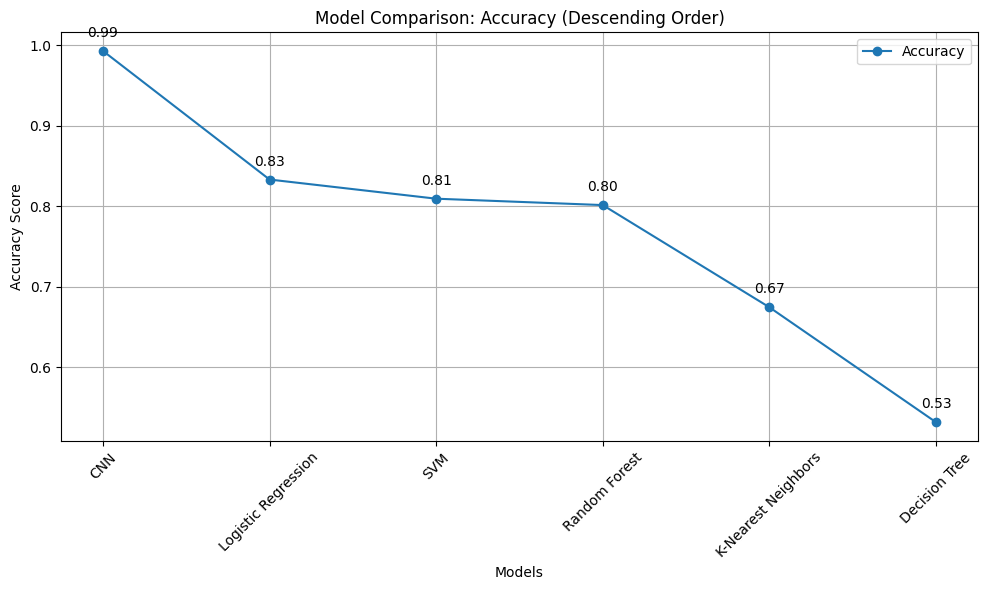

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming random accuracy scores for each model
models = ['SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'K-Nearest Neighbors', 'Neural Network']
accuracy_scores = {
    'SVM': accuracy_score(y_test, y_pred_SVM),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rt),
    'Logistic Regression': logreg_accuracy,
    'K-Nearest Neighbors': accuracy_score(y_test, y_pred_knn),
    'CNN': train_accuracy  # Accuracy from the neural network model
}

# Convert dictionary to list of tuples (model, accuracy) for sorting
accuracy_scores = [(model, accuracy) for model, accuracy in accuracy_scores.items()]

# Sort models based on accuracy scores in descending order
accuracy_scores.sort(key=lambda x: x[1], reverse=True)
models, accuracy_scores = zip(*accuracy_scores)  # Unzip the sorted list

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy_scores, marker='o', linestyle='-', label='Accuracy')

# Adding text annotations for each data point
for i, txt in enumerate(accuracy_scores):
    plt.annotate(f'{txt:.2f}', (models[i], accuracy_scores[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Model Comparison: Accuracy (Descending Order)')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


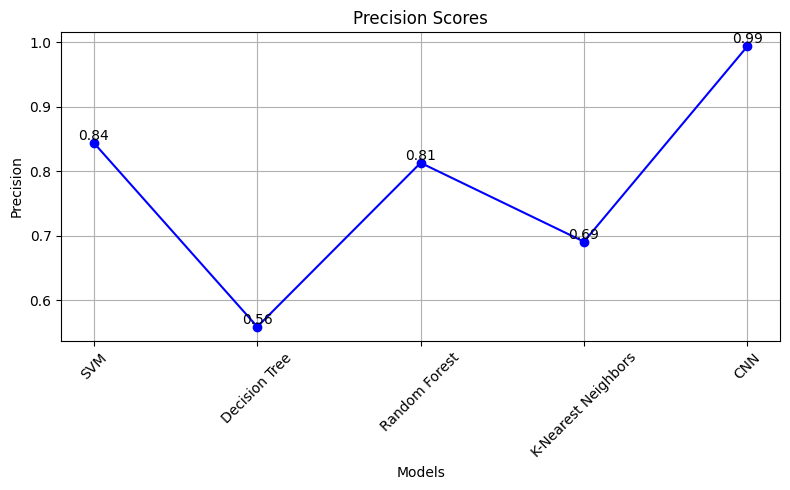

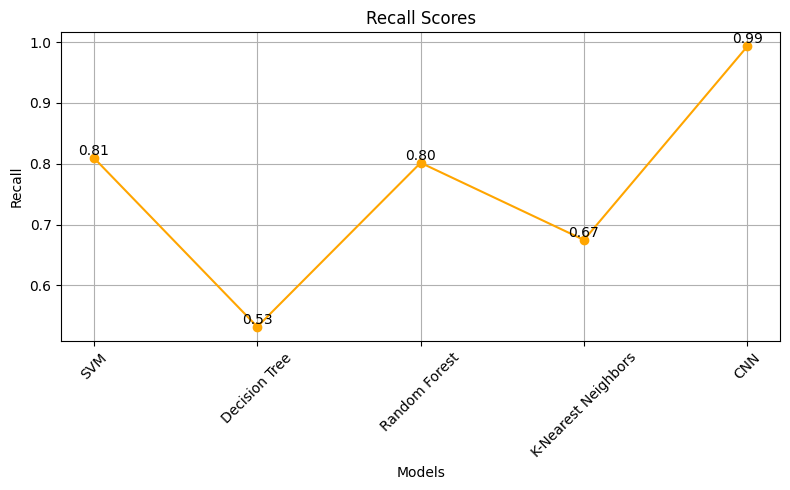

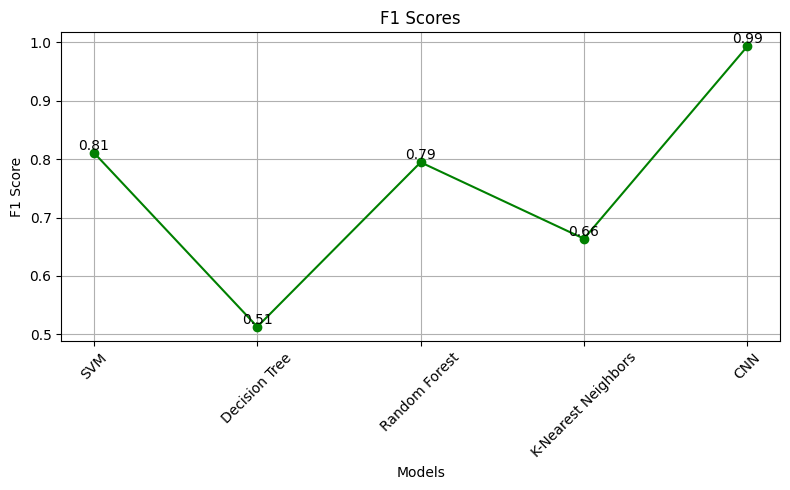

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred_SVM, y_pred_dt, y_pred_rt, y_pred_knn are available

# Calculate F1 score, precision, and recall for each model
f1_scores = {
    'SVM': f1_score(y_test, y_pred_SVM, average='weighted'),
    'Decision Tree': f1_score(y_test, y_pred_dt, average='weighted'),
    'Random Forest': f1_score(y_test, y_pred_rt, average='weighted'),
    'K-Nearest Neighbors': f1_score(y_test, y_pred_knn, average='weighted'),
    'CNN' :f1_score(y_train_categorical, np.argmax(y_pred_train, axis=1), average='weighted')
}

precision_scores = {
    'SVM': precision_score(y_test, y_pred_SVM, average='weighted'),
    'Decision Tree': precision_score(y_test, y_pred_dt, average='weighted'),
    'Random Forest': precision_score(y_test, y_pred_rt, average='weighted'),
    'K-Nearest Neighbors': precision_score(y_test, y_pred_knn, average='weighted'),
    'CNN': precision_score(y_train_categorical, np.argmax(y_pred_train, axis=1), average='weighted')
}

recall_scores = {
    'SVM': recall_score(y_test, y_pred_SVM, average='weighted'),
    'Decision Tree': recall_score(y_test, y_pred_dt, average='weighted'),
    'Random Forest': recall_score(y_test, y_pred_rt, average='weighted'),
    'K-Nearest Neighbors': recall_score(y_test, y_pred_knn, average='weighted'),
    'CNN': recall_score(y_train_categorical, np.argmax(y_pred_train, axis=1), average='weighted')
}


# Create lists of model names and corresponding scores for plotting
models = list(f1_scores.keys())
f1_values = list(f1_scores.values())
precision_values = list(precision_scores.values())
recall_values = list(recall_scores.values())

# Plotting Precision
plt.figure(figsize=(8, 5))
plt.plot(models, precision_values, marker='o', linestyle='-', color='blue')
for i, txt in enumerate(precision_values):
    plt.text(models[i], precision_values[i], f'{txt:.2f}', ha='center', va='bottom')
plt.title('Precision Scores')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Plotting Recall
plt.figure(figsize=(8, 5))
plt.plot(models, recall_values, marker='o', linestyle='-', color='orange')
for i, txt in enumerate(recall_values):
    plt.text(models[i], recall_values[i], f'{txt:.2f}', ha='center', va='bottom')
plt.title('Recall Scores')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Plotting F1 Score
plt.figure(figsize=(8, 5))
plt.plot(models, f1_values, marker='o', linestyle='-', color='green')
for i, txt in enumerate(f1_values):
    plt.text(models[i], f1_values[i], f'{txt:.2f}', ha='center', va='bottom')
plt.title('F1 Scores')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train_categorical, np.argmax(y_pred_train, axis=1), average='weighted')
recall = recall_score(y_train_categorical, np.argmax(y_pred_train, axis=1), average='weighted')
f1 = f1_score(y_train_categorical, np.argmax(y_pred_train, axis=1), average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9933
Recall: 0.9932
F1 Score: 0.9932
